## Importing data and packages

In [1]:
import pandas as pd
import numpy as np

In [14]:
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('clean_data_3.csv')

## Creating the baseline model

We will generate the baseline as randomly guessing that an observation will be 1 with probability $P$.  We don't want to use just $P-0.5$ because our data is not balanced - there are many more 0's than 1's in our observations.

In [5]:
#define N as the number of observations that are 1
N = df['Y'].value_counts()[1]

#define T as the total number of observations
T = len(df)

In [26]:
#define probs as a list of probabilities P
iters=10
probs=[(1/iters)*i for i in range(0,iters+1)]

In [28]:
#Accuracy = (TP+TN)/TOTAL
accuracy = [(N*P+(1-P)*(T-N))/T for P in probs]

#recall = TP/(TN+FP)
recall=[N*P/N for P in probs]

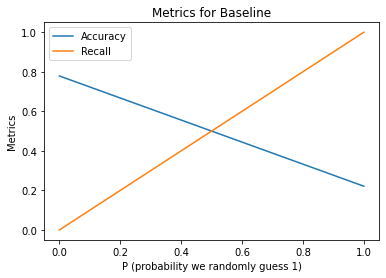

In [53]:
plt.plot(probs, accuracy,
        label="Accuracy")

plt.plot(probs, recall,
        label="Recall")

plt.title('Metrics for Baseline')
plt.xlabel('P (probability we randomly guess 1)')
plt.ylabel('Metrics')

plt.legend()
plt.show()

## Comparing our models to the Baseline

Here we plot the accuracy and recall of our various models against the baseline.

We can think of models above the line as better than the baseline.

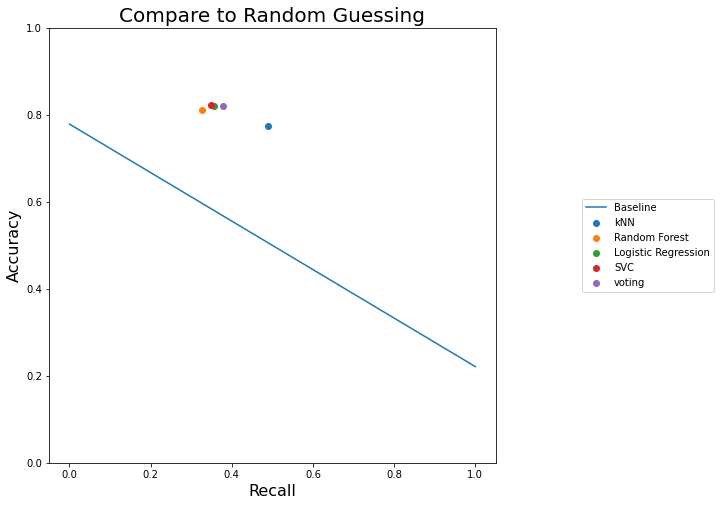

In [57]:
plt.figure(figsize=(8,8))

plt.plot(recall, accuracy,
        label='Baseline')

plt.title('Compare to Random Guessing', fontsize=20)

plt.xlabel('Recall', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.scatter(0.4899, 0.7753,
       label='kNN')

plt.scatter(0.3253, 0.8103,
           label='Random Forest')

plt.scatter(0.3554, 0.8213,
           label='Logistic Regression')

plt.scatter(0.3494, 0.8227,
           label='SVC')

plt.scatter(0.378, 0.8203,
           label='voting')

#plt.plot([0,1],[accuracy[0], accuracy[0]])


plt.ylim((0,1))

plt.legend(loc="center right", bbox_to_anchor=(1.5, 0.5))
plt.show()